# 3. Data preparation


In [62]:
import nltk
import pandas as pd
import math
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec

from sklearn import datasets, linear_model
import numpy as np
from numbers import Number

from sklearn import preprocessing

In [63]:
def correlation_matrix(df,figsize=(15,15)):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=figsize)
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

In [64]:
train= pd.read_csv("../data/train.csv")
train.set_index('Id')

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1             60       RL         65.0     8450   Pave   NaN      Reg   
2             20       RL         80.0     9600   Pave   NaN      Reg   
3             60       RL         68.0    11250   Pave   NaN      IR1   
4             70       RL         60.0     9550   Pave   NaN      IR1   
5             60       RL         84.0    14260   Pave   NaN      IR1   
6             50       RL         85.0    14115   Pave   NaN      IR1   
7             20       RL         75.0    10084   Pave   NaN      Reg   
8             60       RL          NaN    10382   Pave   NaN      IR1   
9             50       RM         51.0     6120   Pave   NaN      Reg   
10           190       RL         50.0     7420   Pave   NaN      Reg   
11            20       RL         70.0    11200   Pave   NaN      Reg   
12            60       RL         85.0    11924   Pave   NaN      IR1   
13            20       RL          NaN    12968   Pave   NaN      IR2   
14            20       RL         91.0    10652   Pave   NaN      IR1   
15            20       RL          NaN    10920   Pave   NaN      IR1   
16            45       RM         51.0     6120   Pave   NaN      Reg   
17            20       RL          NaN    11241   Pave   NaN      IR1   
18            90       RL         72.0    10791   Pave   NaN      Reg   
19            20       RL         66.0    13695   Pave   NaN      Reg   
20            20       RL         70.0     7560   Pave   NaN      Reg   
21            60       RL        101.0    14215   Pave   NaN      IR1   
22            45       RM         57.0     7449   Pave  Grvl      Reg   
23            20       RL         75.0     9742   Pave   NaN      Reg   
24           120       RM         44.0     4224   Pave   NaN      Reg   
25            20       RL          NaN     8246   Pave   NaN      IR1   
26            20       RL        110.0    14230   Pave   NaN      Reg   
27            20       RL         60.0     7200   Pave   NaN      Reg   
28            20       RL         98.0    11478   Pave   NaN      Reg   
29            20       RL         47.0    16321   Pave   NaN      IR1   
30            30       RM         60.0     6324   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1431          60       RL         60.0    21930   Pave   NaN      IR3   
1432         120       RL          NaN     4928   Pave   NaN      IR1   
1433          30       RL         60.0    10800   Pave  Grvl      Reg   
1434          60       RL         93.0    10261   Pave   NaN      IR1   
1435          20       RL         80.0    17400   Pave   NaN      Reg   
1436          20       RL         80.0     8400   Pave   NaN      Reg   
1437          20       RL         60.0     9000   Pave   NaN      Reg   
1438          20       RL         96.0    12444   Pave   NaN      Reg   
1439          20       RM         90.0     7407   Pave   NaN      Reg   
1440          60       RL         80.0    11584   Pave   NaN      Reg   
1441          70       RL         79.0    11526   Pave   NaN      IR1   
1442         120       RM          NaN     4426   Pave   NaN      Reg   
1443          60       FV         85.0    11003   Pave   NaN      Reg   
1444          30       RL          NaN     8854   Pave   NaN      Reg   
1445          20       RL         63.0     8500   Pave   NaN      Reg   
1446          85       RL         70.0     8400   Pave   NaN      Reg   
1447          20       RL          NaN    26142   Pave   NaN      IR1   
1448          60       RL         80.0    10000   Pave   NaN      Reg   
1449          50       RL         70.0    11767   Pave   NaN      Reg   
1450         180       RM         21.0     1533   Pave   NaN      Reg   
1451          90       RL         60.0     9000   Pave   NaN      Reg   
1452          20       RL         78.0     9262   Pave   NaN    

## 3.1 Select Data
### Outputs:
- Rationale for Inclusion/Exclusion


In [65]:
del train['Utilities']


## 3.2 Clean Data
### Outputs:
- Data Cleaning Report


In [66]:
train=train[train['LotArea']<55000]
train=train[train['LotFrontage']<300]
train['LotFrontage'].fillna(train['LotFrontage'].mean(),inplace=True)
train=train[train['MasVnrArea']<1200]
train['Alley'].fillna('XX',inplace=True)
train=train[train['MasVnrArea']<1200]
train['MasVnrArea'].fillna(train['MasVnrArea'].mean(),inplace=True)
train['BsmtQual'].fillna('XX',inplace=True)
train['BsmtCond'].fillna('XX',inplace=True)
train['BsmtExposure'].fillna('XX',inplace=True)
train['BsmtFinType1'].fillna('XX',inplace=True)
train['BsmtFinType2'].fillna('XX',inplace=True)
train=train[train['BsmtFinSF1']<5000]
train=train[train['BsmtFinSF2']<1400]
train=train[train['TotalBsmtSF']<3500]
train['Electrical'].dropna(inplace=True)
train=train[train['1stFlrSF']!=0]
train=train[train['1stFlrSF']<4000]
train=train[train['GrLivArea']!=0]
train['MiscFeature'].fillna('XX',inplace=True)
train['MiscVal'].fillna(0,inplace=True)
train['FireplaceQu'].fillna('XX',inplace=True)
train['GarageType'].fillna('XX',inplace=True)
train['GarageYrBlt'].fillna(0,inplace=True)
train['GarageFinish'].fillna('XX',inplace=True)
train['GarageQual'].fillna('XX',inplace=True)
train['GarageCond'].fillna('XX',inplace=True)
train=train[train['WoodDeckSF']<750]
train=train[train['OpenPorchSF']<400]
train=train[train['EnclosedPorch']<400]
train['PoolQC'].fillna('XX',inplace=True)
train['Fence'].fillna('XX',inplace=True)


In [67]:
train.to_csv('../data/train_cleaned.csv')


## 3.3 Construct Data
### Outputs:
- Derived Attributes
- Generated Records

## 3.4 Integrate Data
### Outputs:

- Merged Data



## 3.5 Format Data
### Outputs:

- Reformatted Data
- Dataset
- Dataset Description

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


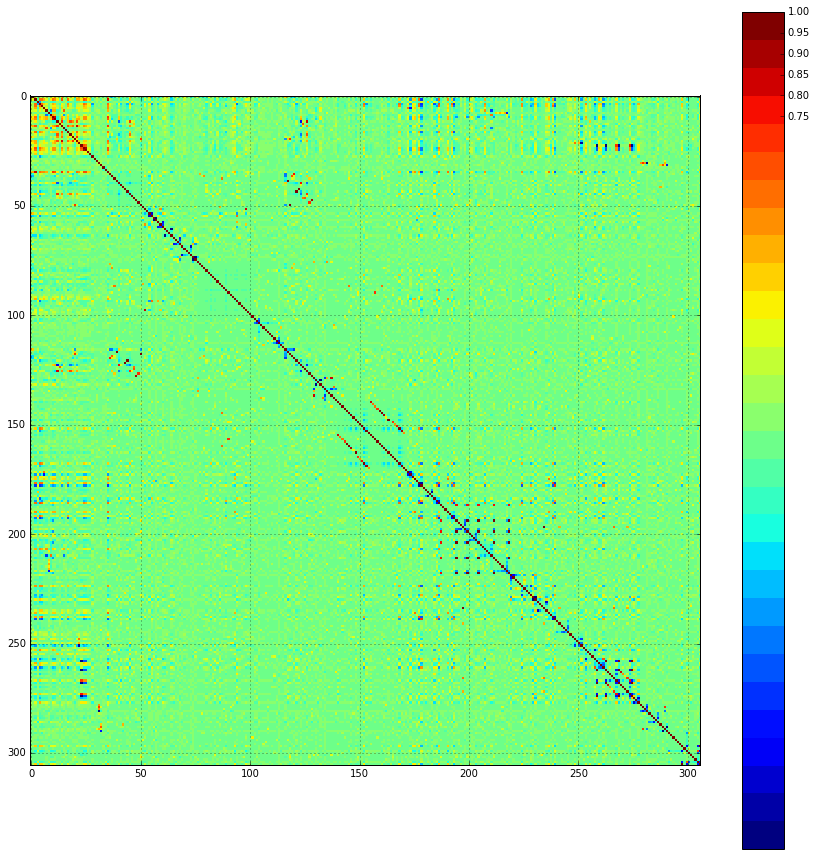

In [68]:
train['MSSubClass'] = train['MSSubClass'].apply(str)

Numeric_columns=['LotFrontage',
                'LotArea',
                'OverallQual',
                'OverallCond',
                'YearBuilt',
                'YearRemodAdd',
                'MasVnrArea',
                'BsmtFinSF1',
                'BsmtFinSF2',
                'BsmtUnfSF',
                'TotalBsmtSF',
                '1stFlrSF',
                '2ndFlrSF',
                'LowQualFinSF',
                'GrLivArea',
                'BsmtFullBath',
                'BsmtHalfBath',
                'FullBath',
                'HalfBath',
                'BedroomAbvGr',
                'KitchenAbvGr',
                'TotRmsAbvGrd',
                'Fireplaces',
                'GarageYrBlt',
                'GarageCars',
                'GarageArea',
                'WoodDeckSF',
                'OpenPorchSF',
                'EnclosedPorch',
                '3SsnPorch',
                'ScreenPorch',
                'PoolArea',
                'MiscVal',
                'MoSold',
                'YrSold',
                'TotalBsmtSF']
for i in Numeric_columns:
    train[i]=preprocessing.scale(train[i])
    train[i]=preprocessing.

train_dummied=pd.get_dummies(train)
train_dummied=train_dummied.set_index('Id')
train_dummied.to_csv('../data/train_dummied.csv')
correlation_matrix(train_dummied)

In [70]:
train_dummied

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                 
1       -0.199823 -0.255583     0.645583    -0.517260   1.026636   
2        0.488331  0.007696    -0.068975     2.226231   0.173838   
3       -0.062192  0.385444     0.645583    -0.517260   0.963466   
4       -0.429208 -0.003751     0.645583    -0.517260  -1.752853   
5        0.671839  1.074547     1.360141    -0.517260   0.931881   
6        0.717716  1.041351    -0.783533    -0.517260   0.710785   
7        0.258946  0.118502     1.360141    -0.517260   1.058221   
9       -0.842100 -0.789008     0.645583    -0.517260  -1.247491   
10      -0.887977 -0.491389    -0.783533     0.397237  -0.994810   
11       0.029562  0.373997    -0.783533    -0.517260  -0.173598   
12       0.717716  0.539748     2.074699    -0.517260   1.089806   
14       0.992978  0.248539     0.645583    -0.517260   1.121391   
16      -0.842100 -0.789008     0.645583     2.226231  -1.310661   
18       0.121316  0.280361    -1.498091    -0.517260  -0.110427   
19      -0.153946  0.945197    -0.783533    -0.517260   1.058221   
20       0.029562 -0.459338    -0.783533     0.397237  -0.394693   
21       1.451747  1.064245     1.360141    -0.517260   1.089806   
22      -0.566839 -0.484750     0.645583     1.311734  -1.279076   
23       0.258946  0.040205     1.360141    -0.517260   0.995051   
24      -1.163239 -1.223075    -0.783533     1.311734   0.173838   
26       1.864640  1.067679     1.360141    -0.517260   1.152976   
27      -0.429208 -0.541755    -0.783533     1.311734  -0.615789   
28       1.314116  0.437641     1.360141    -0.517260   1.152976   
29      -1.025608  1.546388    -0.783533     0.397237  -0.426278   
30      -0.429208 -0.742305    -1.498091     0.397237  -1.373831   
31      -0.887977 -0.244136    -1.498091    -1.431757  -1.594927   
33       0.717716  0.339427     1.360141    -0.517260   1.152976   
34       0.029562  0.225645    -0.783533    -0.517260  -0.363108   
35      -0.429208 -0.515885     2.074699    -0.517260   1.089806   
36       1.772886  0.881781     1.360141    -0.517260   1.058221   
...           ...       ...          ...          ...        ...   
1426     0.488331  0.264335    -0.068975     0.397237  -0.363108   
1427     0.534208  0.315389     0.645583    -0.517260   0.742370   
1428    -0.429208  0.312183    -0.783533     0.397237  -0.805300   
1429    -0.429208 -0.541755    -0.783533     1.311734  -0.963225   
1431    -0.429208  2.830501    -0.783533    -0.517260   1.089806   
1433    -0.429208  0.282421    -1.498091     0.397237  -1.373831   
1434     1.084731  0.159024    -0.068975    -0.517260   0.931881   
1435     0.488331  1.793412    -0.783533    -0.517260   0.205423   
1436     0.488331 -0.267030    -0.068975     3.140728  -0.268353   
1437    -0.429208 -0.129667    -1.498091     0.397237   0.015913   
1438     1.222362  0.658795     1.360141    -0.517260   1.184562   
1439     0.947101 -0.494365    -0.068975     1.311734  -0.426278   
1440     0.488331  0.461909     0.645583     0.397237   0.268594   
1441     0.442454  0.448630    -0.068975     1.311734  -1.531757   
1443     0.717716  0.328896     2.789257    -0.517260   1.184562   
1445    -0.291577 -0.244136     0.645583    -0.517260   1.058221   
1446     0.029562 -0.267030    -0.068975    -0.517260  -0.142013   
1448     0.488331  0.099271     1.360141    -0.517260   0.773955   
1449     0.029562  0.503804    -1.498091     1.311734  -1.910778   
1450    -2.218409 -1.839147    -0.783533     1.311734  -0.015672   
1451    -0.429208 -0.129667    -0.783533    -0.517260   0.110668   
1452     0.396577 -0.069685     1.360141    -0.517260   1.184562   
1453    -1.576131 -1.348762    -0.783533    -0.517260   1.089806   
1454     0.947101  1.751516    -0.783533    -0.517260   1.121391   
1455    -0.337454 -0.473074     0.645583    -0.517260   1.058221   
1456    -0.337454 -0.377607    -0.068975    -0.517260   0.9002

In [69]:
test_dummied=pd.read_csv('../data/test.csv')
test_dummied

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
5     1466          60       RL         75.0    10000   Pave   NaN      IR1   
6     1467          20       RL          NaN     7980   Pave   NaN      IR1   
7     1468          60       RL         63.0     8402   Pave   NaN      IR1   
8     1469          20       RL         85.0    10176   Pave   NaN      Reg   
9     1470          20       RL         70.0     8400   Pave   NaN      Reg   
10    1471         120       RH         26.0     5858   Pave   NaN      IR1   
11    1472         160       RM         21.0     1680   Pave   NaN      Reg   
12    1473         160       RM         21.0     1680   Pave   NaN      Reg   
13    1474         160       RL         24.0     2280   Pave   NaN      Reg   
14    1475         120       RL         24.0     2280   Pave   NaN      Reg   
15    1476          60       RL        102.0    12858   Pave   NaN      IR1   
16    1477          20       RL         94.0    12883   Pave   NaN      IR1   
17    1478          20       RL         90.0    11520   Pave   NaN      Reg   
18    1479          20       RL         79.0    14122   Pave   NaN      IR1   
19    1480          20       RL        110.0    14300   Pave   NaN      Reg   
20    1481          60       RL        105.0    13650   Pave   NaN      Reg   
21    1482         120       RL         41.0     7132   Pave   NaN      IR1   
22    1483          20       RL        100.0    18494   Pave   NaN      IR1   
23    1484         120       RL         43.0     3203   Pave   NaN      Reg   
24    1485          80       RL         67.0    13300   Pave   NaN      IR1   
25    1486          60       RL         63.0     8577   Pave   NaN      IR1   
26    1487          60       RL         60.0    17433   Pave   NaN      IR2   
27    1488          20       RL         73.0     8987   Pave   NaN      Reg   
28    1489          20       FV         92.0     9215   Pave   NaN      Reg   
29    1490          20       FV         84.0    10440   Pave   NaN      Reg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1429  2890          30       RM         50.0     7030   Pave   NaN      Reg   
1430  2891          50       RM         75.0     9060   Pave   NaN      Reg   
1431  2892          30  C (all)         69.0    12366   Pave   NaN      Reg   
1432  2893         190  C (all)         50.0     9000   Pave   NaN      Reg   
1433  2894          50  C (all)         60.0     8520   Grvl   NaN      Reg   
1434  2895         120       RM         41.0     5748   Pave   NaN      IR1   
1435  2896         120       RM         44.0     3842   Pave   NaN      IR1   
1436  2897          20       RL         69.0    23580   Pave   NaN      IR1   
1437  2898          90       RL         65.0     8385   Pave   NaN      Reg   
1438  2899          20       RL         70.0     9116   Pave   NaN      Reg   
1439  2900          80       RL        140.0    11080   Pave   NaN      Reg   
1440  2901          20       RL          NaN    50102   Pave   NaN      IR1   
1441  2902          20       RL          NaN     8098   Pave   NaN      IR1   
1442  2903          20       RL         95.0    13618   Pave   NaN      Reg   
1443  2904          20       RL         88.0    11577   Pave   NaN      Reg   
1444  2905          20      NaN        125.0    31250   Pave   NaN      Reg   
1445  2906          90       RM         78.0     7020   Pave   NaN      Reg   
1446  2907         160       RM         41.0     2665   Pave   NaN      Reg   
1447  2908          20       RL         58.0    10172   Pa